<a href="https://colab.research.google.com/github/Nathtaba/Case_Fraud_Card_TreeModels_ML/blob/main/Fraude_Card_TreeModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [4]:
#subindo a base de dados
dt_card = pd.read_csv("card_transdata_tree.csv", sep=",")

In [5]:
dt_card.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [23]:
dt_card.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,178698.000000,178698.000000,178698.000000,178698.000000,178698.000000,178698.000000,178698.000000,178698.000000
mean,26.668376,4.982252,1.816061,0.881549,0.350261,0.102245,0.651423,0.086839
std,64.756535,23.432514,2.812998,0.323143,0.477053,0.302971,0.476521,0.281600
min,0.021322,0.000419,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.845387,0.294419,0.475434,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.962409,0.999468,0.996602,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.735885,3.352175,2.090568,1.000000,1.000000,0.000000,1.000000,0.000000
max,4601.011222,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Verifica se existe valores nulos
dt_card.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
#Limpando os valores nulos
dt_card = dt_card.dropna()

<Axes: >

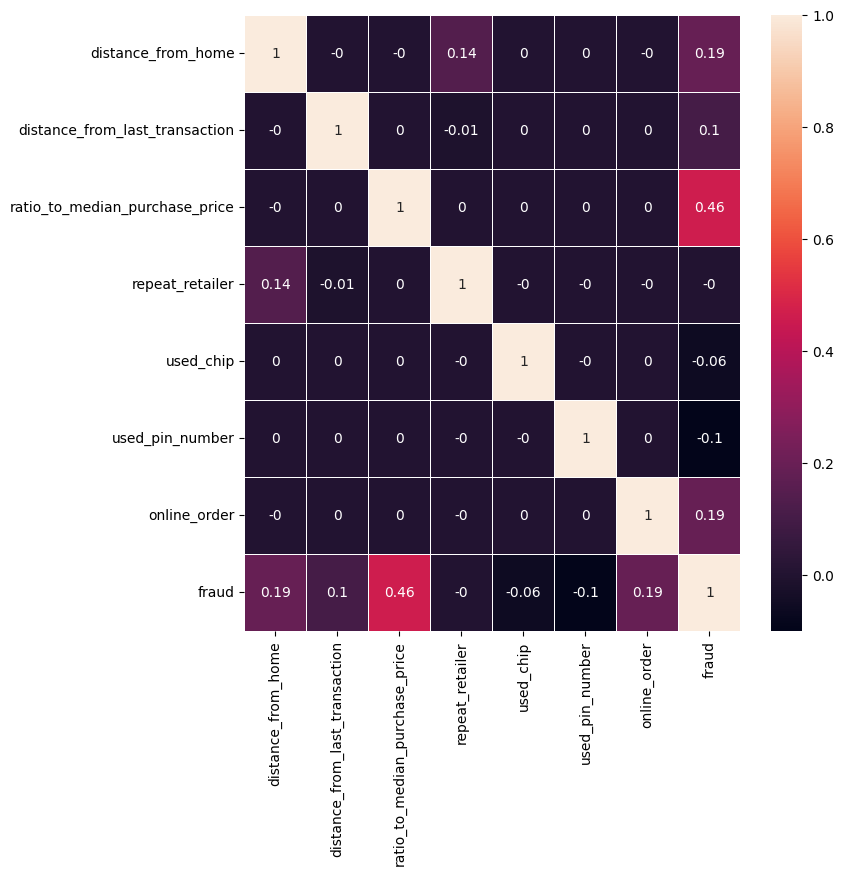

In [10]:
#Analisando correlações
correlation_matrix = dt_card.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [12]:
#Separando os dados
X = dt_card.drop(columns=['fraud'])
y = dt_card['fraud'] # Target

In [18]:
#Separando em bases de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)

Modelo - Decision Tree

In [34]:
DecisionTree = DecisionTreeClassifier(random_state=7, criterion='entropy', max_depth=3)

In [35]:
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=7)

In [36]:
y_predit = DecisionTree.predict(X_test)

In [37]:
y_predit

array([0., 0., 0., ..., 0., 0., 0.])

[Text(0.5, 0.875, 'x[2] <= 4.0\nentropy = 0.426\nsamples = 142958\nvalue = [130544, 12414]'),
 Text(0.25, 0.625, 'x[0] <= 100.015\nentropy = 0.171\nsamples = 128404\nvalue = [125141, 3263]'),
 Text(0.125, 0.375, 'x[1] <= 50.047\nentropy = 0.052\nsamples = 121932\nvalue = [121217, 715]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 120194\nvalue = [120194, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.977\nsamples = 1738\nvalue = [1023, 715]'),
 Text(0.375, 0.375, 'x[4] <= 0.5\nentropy = 0.967\nsamples = 6472\nvalue = [3924, 2548]'),
 Text(0.3125, 0.125, 'entropy = 0.971\nsamples = 4199\nvalue = [1677, 2522]'),
 Text(0.4375, 0.125, 'entropy = 0.09\nsamples = 2273\nvalue = [2247, 26]'),
 Text(0.75, 0.625, 'x[6] <= 0.5\nentropy = 0.952\nsamples = 14554\nvalue = [5403, 9151]'),
 Text(0.625, 0.375, 'x[0] <= 99.952\nentropy = 0.522\nsamples = 5068\nvalue = [4473, 595]'),
 Text(0.5625, 0.125, 'entropy = 0.387\nsamples = 4814\nvalue = [4449, 365]'),
 Text(0.6875, 0.125, 'entropy = 0.451\nsamples 

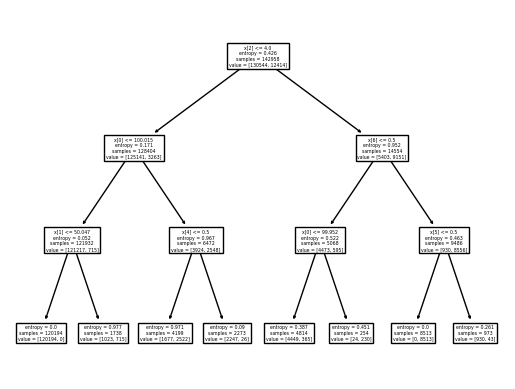

In [38]:
tree.plot_tree(DecisionTree)

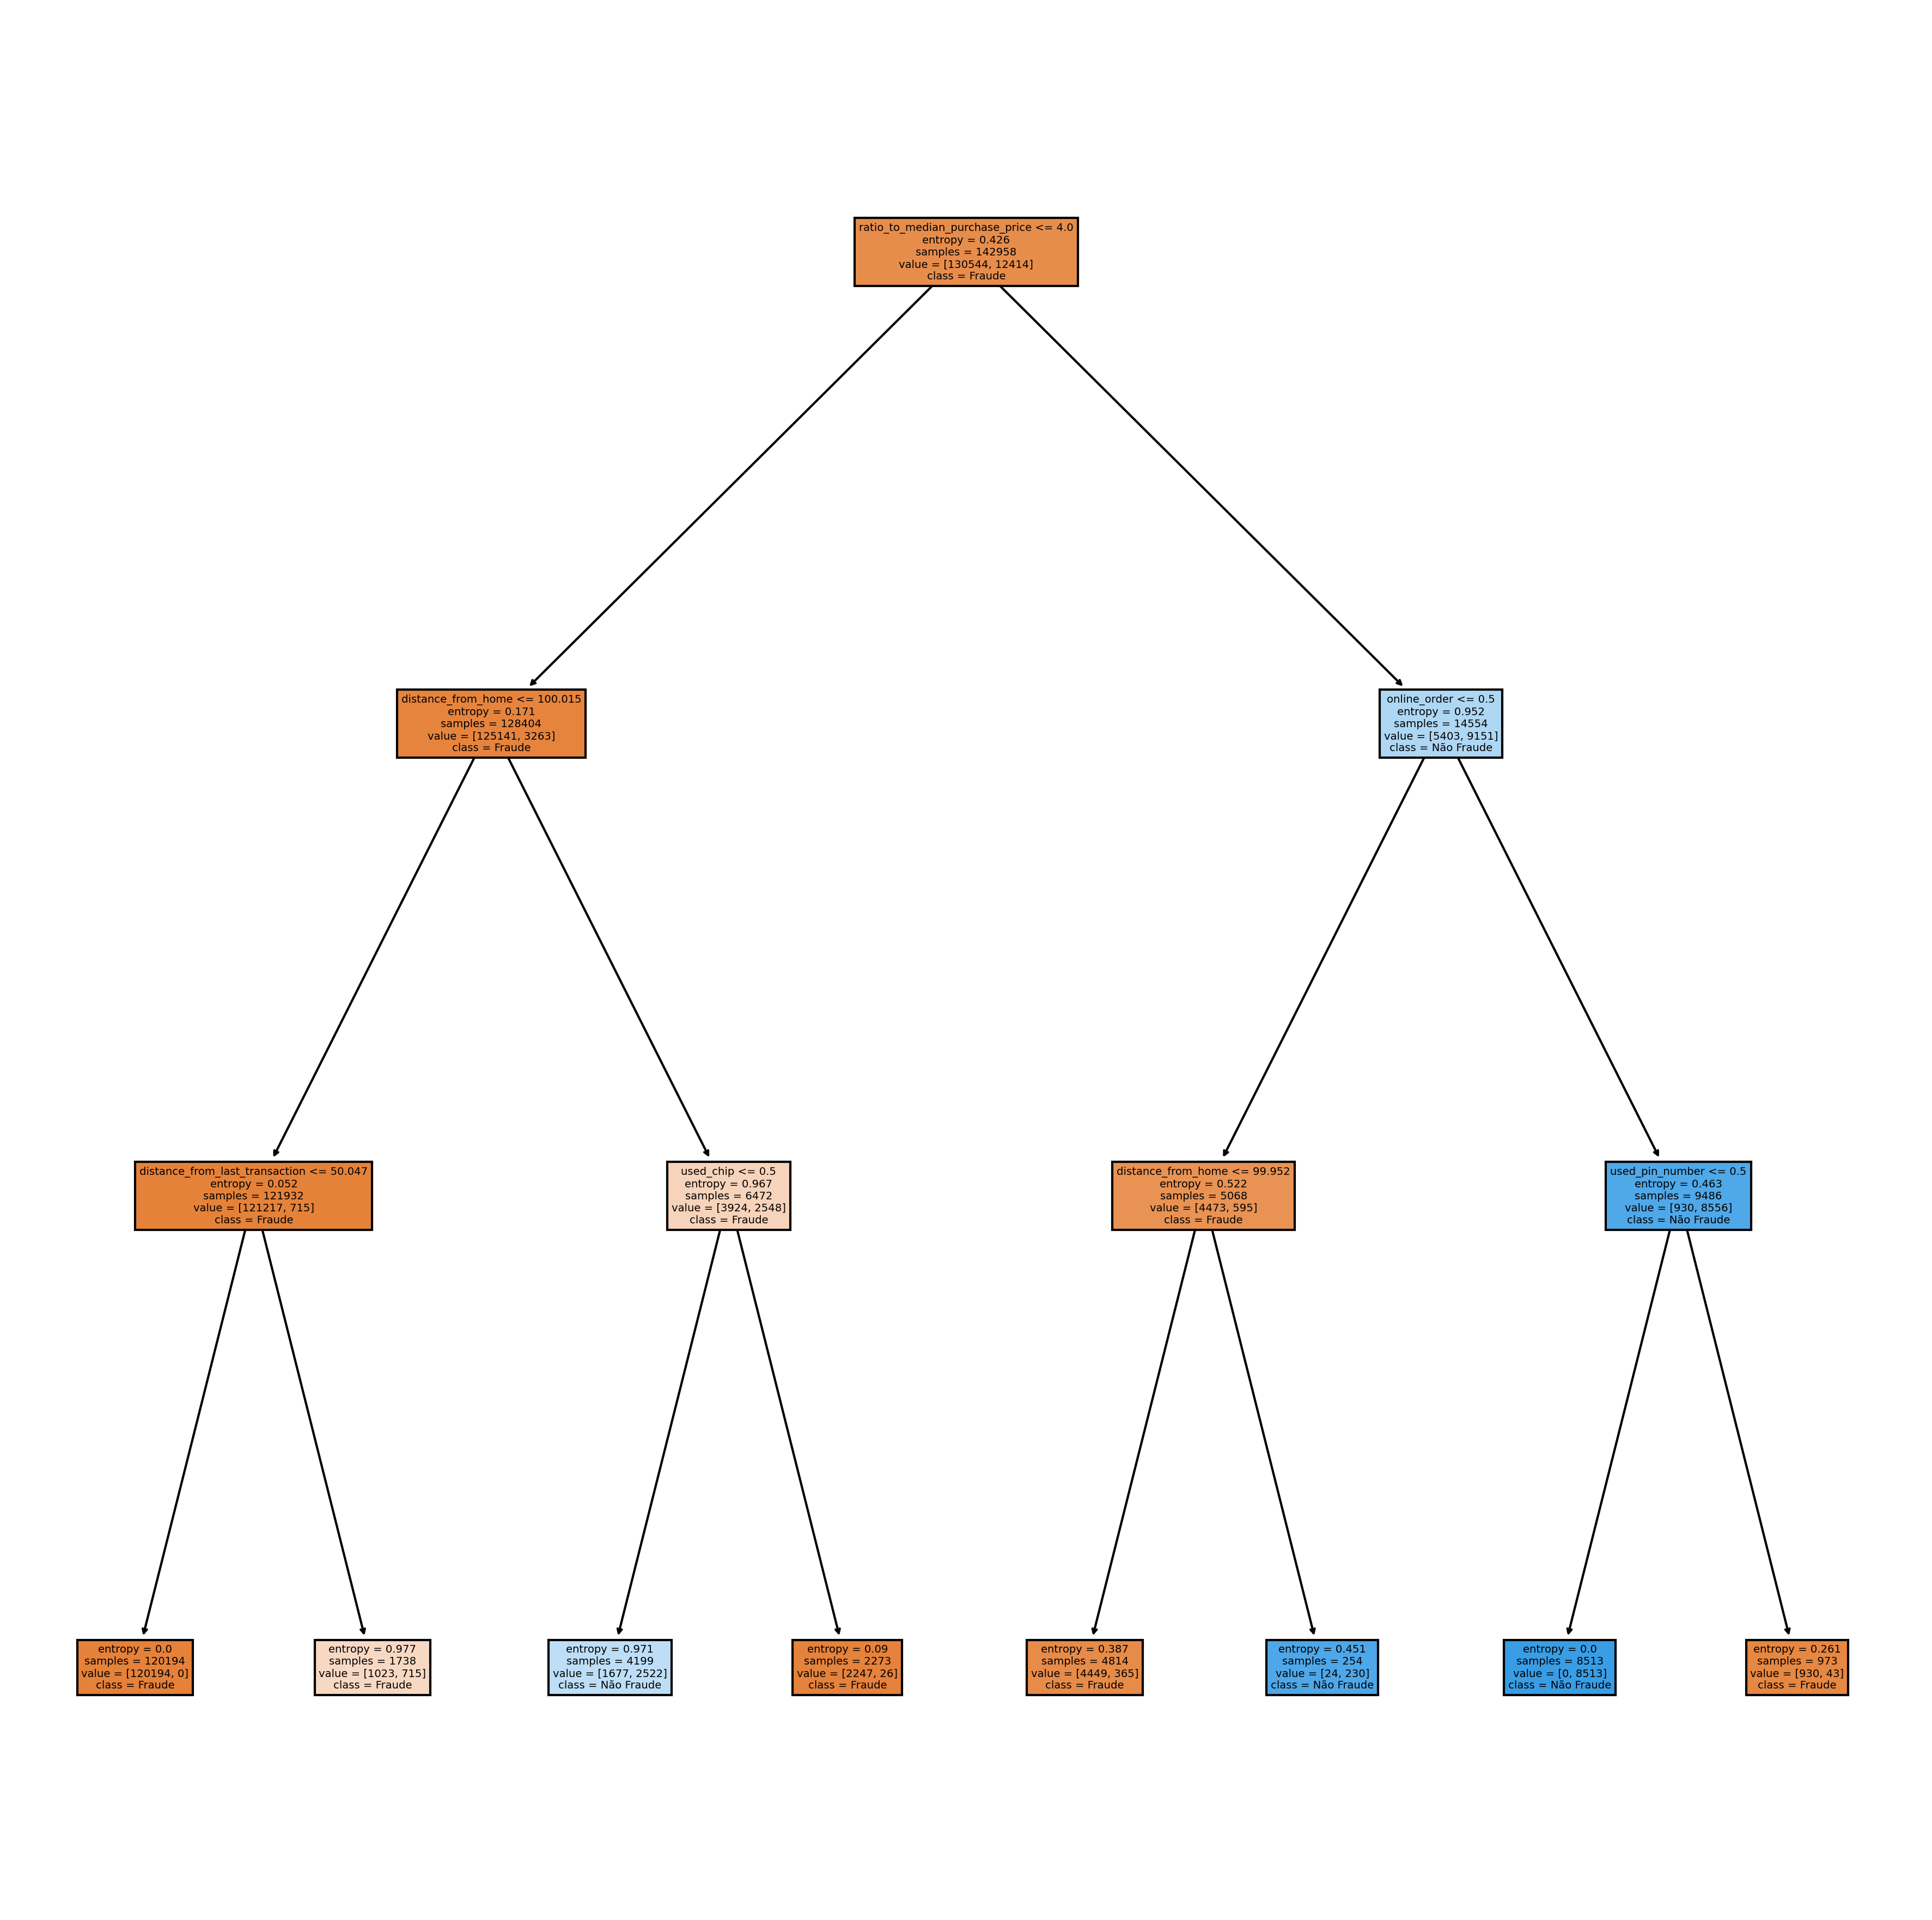

In [39]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=300)

tree.plot_tree(DecisionTree,
               feature_names = label_names,
               class_names=class_names,
               filled = True)

fig.savefig('imagename.png')

In [27]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predit)) #relatório de validação das métrica de desempenho.

0.9667319529938444


Random Forest

In [41]:
RandomForest = RandomForestClassifier(n_estimators=5, max_depth = 2,  random_state=7)

RandomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=7)

In [42]:
estimator = RandomForest.estimators_

In [43]:
estimator

[DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=327741615),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=976413892),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1202242073),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1369975286),
 DecisionTreeClassifier(max_depth=2, max_features='sqrt',
                        random_state=1882953283)]

In [44]:
y_predit_random_forest = RandomForest.predict(X_test)

In [45]:
y_predit_random_forest

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(accuracy_score(y_test, y_predit_random_forest)) #relatório de validação das métrica de desempenho.

0.953217683268047


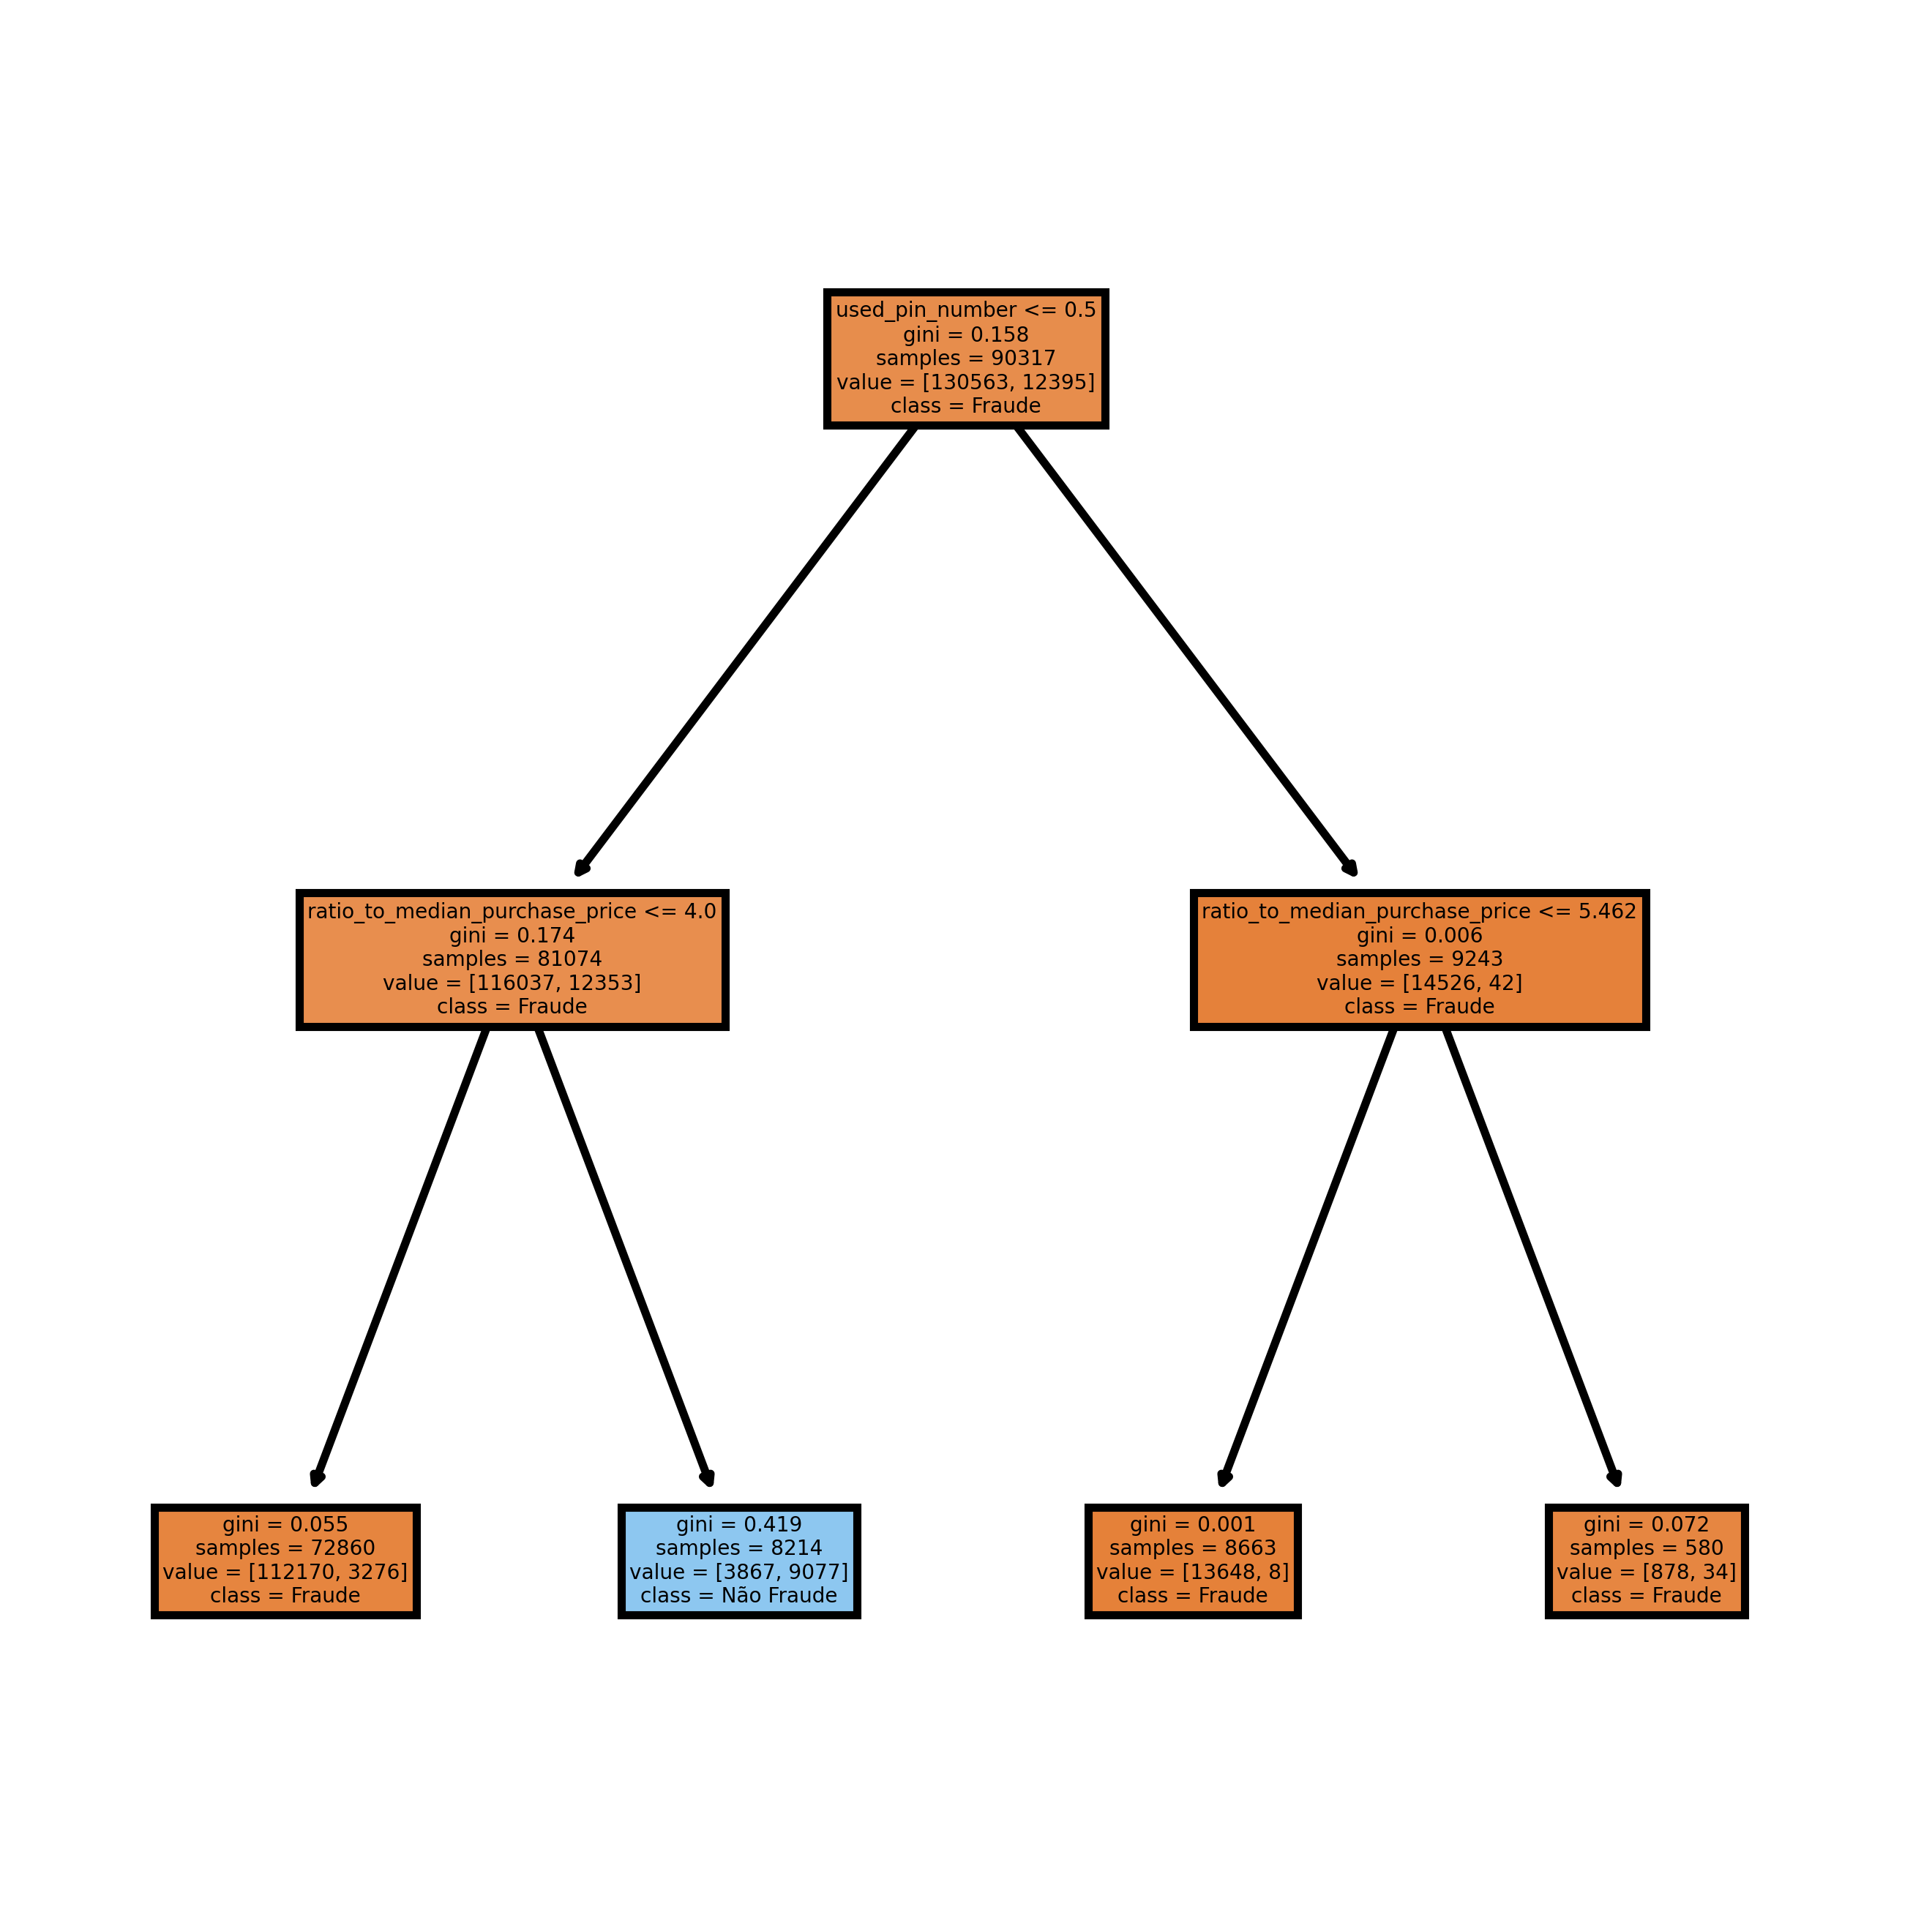

In [48]:
class_names = ['Fraude', 'Não Fraude']
label_names = ['distance_from_home', 'distance_from_last_transaction',	'ratio_to_median_purchase_price',	'repeat_retailer',	'used_chip',	'used_pin_number',	'online_order']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(RandomForest.estimators_[0],
               feature_names = label_names,
               class_names=class_names,
               filled = True);
fig.savefig('rf_individualtree.png')

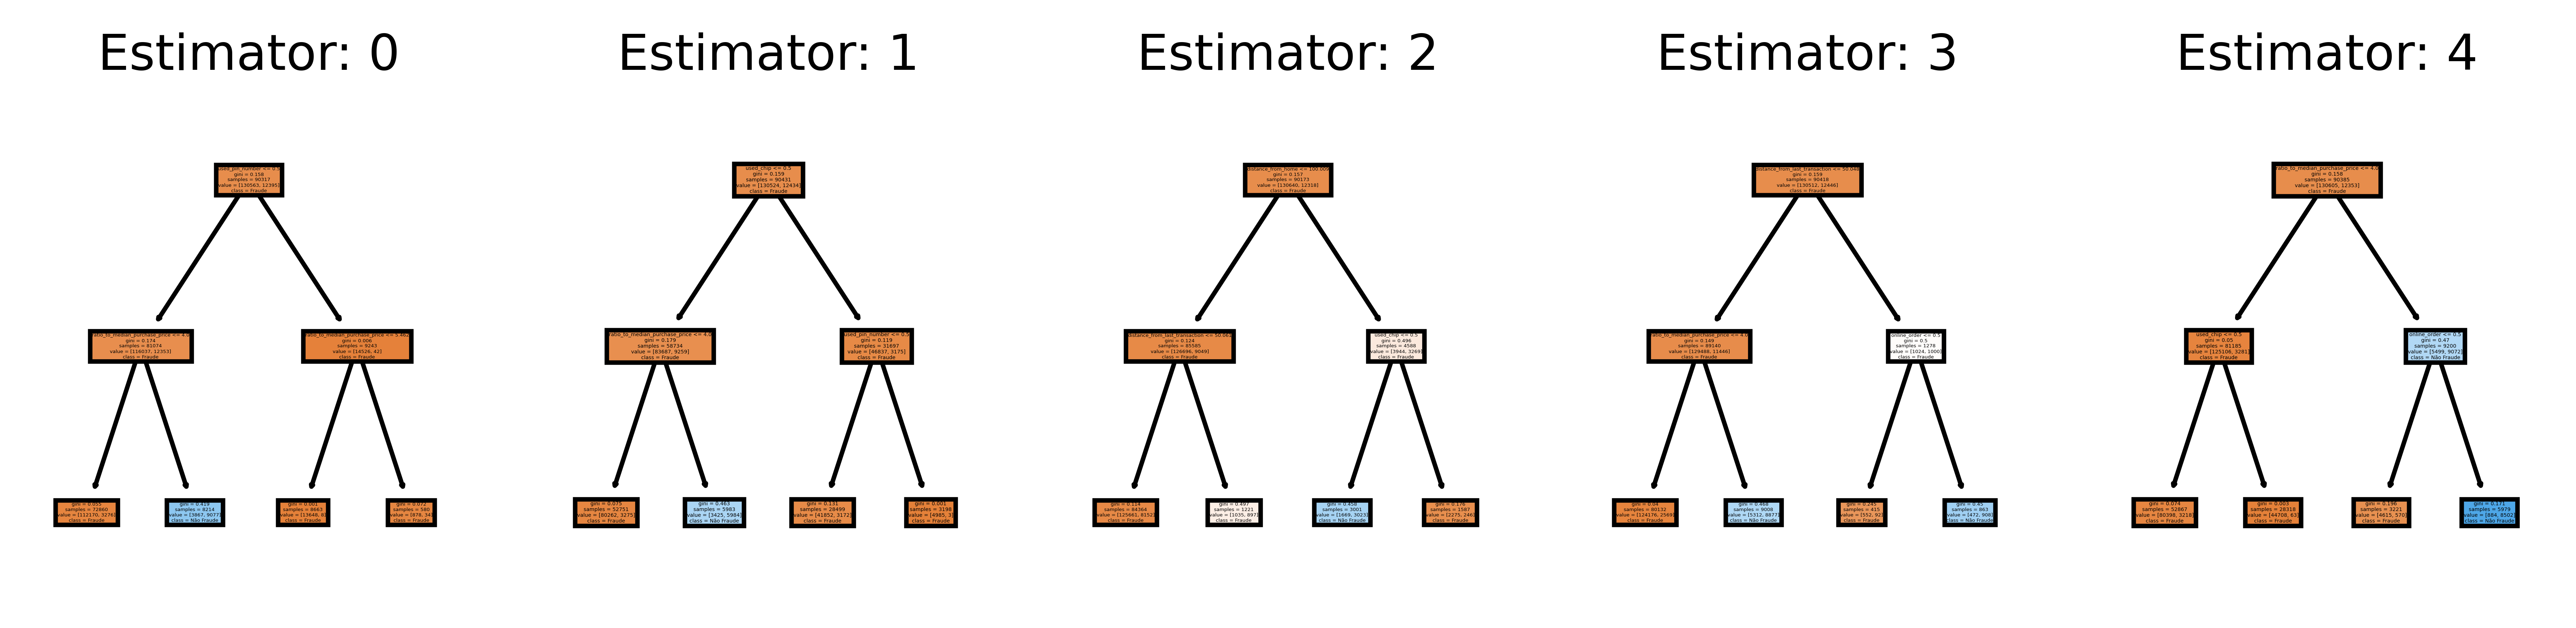

In [49]:
#Plotando todas as arvores geradas
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(RandomForest.estimators_[index],
                   feature_names = label_names,
                   class_names=class_names,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')


In [51]:
print (RandomForest.score(X_train, y_train))
print(RandomForest.score(X_test, y_test))

0.953405895437821
0.953217683268047
